In [1]:
#hide

In [2]:
#hide
import utils
utils.hero("How to build a metronome?")

In [5]:
import librosa
import numpy as np

from musa.plot import Plotter
plotter = Plotter()

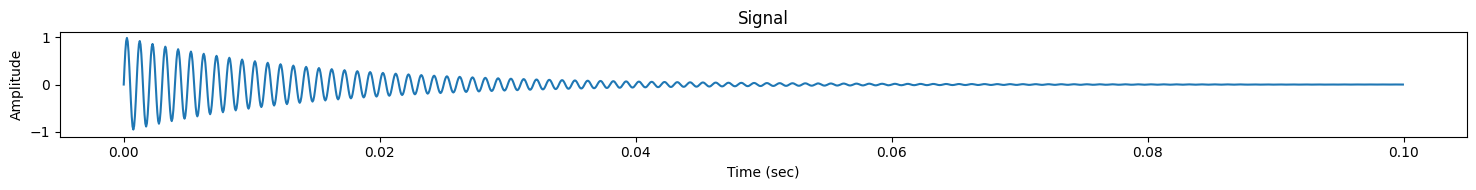

In [14]:
click_freq = 1000.0
click_duration = 0.1
sr = 16000

omega = 2 * np.pi * click_freq
click = np.logspace(0, -10, num=int(sr * click_duration), base=2.0)
click *= np.sin(omega * np.arange(len(click)) / float(sr))
plotter.plot_signal(click, sr=sr);

In [ ]:


click *= np.sin(omega * np.arange(len(click)))

In [4]:
# Compute sample positions from time or frames

else:
    # Create default click signal
    if click_duration <= 0:
        raise ParameterError("click_duration must be strictly positive")

    if click_freq <= 0:
        raise ParameterError("click_freq must be strictly positive")

    angular_freq = 2 * np.pi * click_freq / float(sr)

    click = np.logspace(0, -10, num=int(sr * click_duration), base=2.0)

    click *= np.sin(angular_freq * np.arange(len(click)))

# Set default length
if length is None:
    length = positions.max() + click.shape[-1]
else:
    if length < 1:
        raise ParameterError("length must be a positive integer")

    # Filter out any positions past the length boundary
    positions = positions[positions < length]

# Pre-allocate click signal
shape = list(click.shape)
shape[-1] = length
click_signal = np.zeros(shape, dtype=np.float32)

# Place clicks
for start in positions:
    # Compute the end-point of this click
    end = start + click.shape[-1]

    if end >= length:
        click_signal[..., start:] += click[..., : length - start]
    else:
        # Normally, just add a click here
        click_signal[..., start:end] += click

return click_signal


Signature:
librosa.clicks(
    *,
    times: 'Optional[_SequenceLike[_FloatLike_co]]' = None,
    frames: 'Optional[_SequenceLike[_IntLike_co]]' = None,
    sr: 'float' = 22050,
    hop_length: 'int' = 512,
    click_freq: 'float' = 1000.0,
    click_duration: 'float' = 0.1,
    click: 'Optional[np.ndarray]' = None,
    length: 'Optional[int]' = None,
) -> 'np.ndarray'
Docstring:
Construct a "click track".

This returns a signal with the signal ``click`` sound placed at
each specified time.

Parameters
----------
times : np.ndarray or None
    times to place clicks, in seconds
frames : np.ndarray or None
    frame indices to place clicks
sr : number > 0
    desired sampling rate of the output signal
hop_length : int > 0
    if positions are specified by ``frames``, the number of samples between frames.
click_freq : float > 0
    frequency (in Hz) of the default click signal.  Default is 1KHz.
click_duration : float > 0
    duration (in seconds) of the default click signal.  Default is 